# Descriptive Statistics

### PDF's and CDF's

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.rename(columns={'PetalLengthCm': 'PL', 'PetalWidthCm': 'PW', 'SepalLengthCm': 'SL', 'SepalWidthCm': 'SW'}, inplace=True)
df.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
iris_setosa = df[df['Species'] == 'Iris-setosa']
iris_versicolor = df[df['Species'] == 'Iris-versicolor']
iris_virginica = df[df['Species'] == 'Iris-virginica']

### PDF (Probability Density Function)

Histograms are useful when you are analysing only a single column data. It becomes complicated when you are comparing data across columns or same data but under different categories.

The solution is a different representation of the same Histograms as PDF(Probability Density Fucntion) in Seaborn it is calculated using a Kernel Density Estimator.

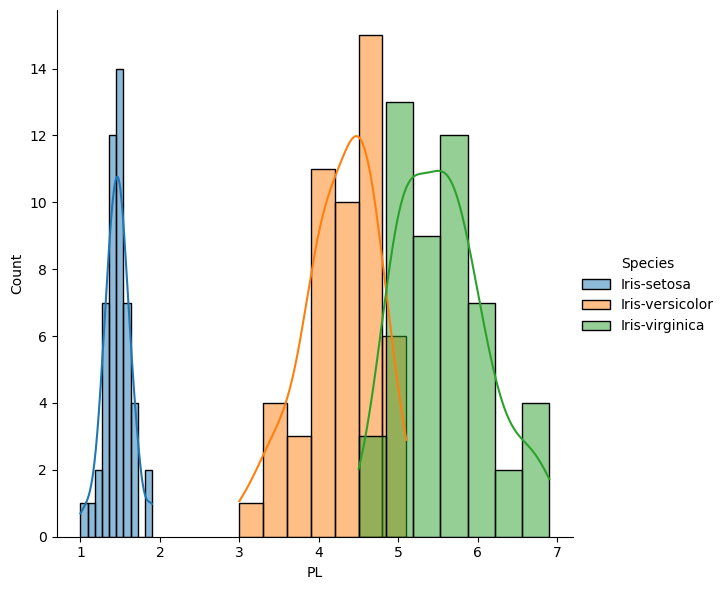

In [14]:
sns.FacetGrid(data=df, hue='Species', height=6).map(sns.histplot, 'PL', kde=True).add_legend()

Imagine you are writing a code to distinguish between the species. Without KDE active, the overlapping bars create uncertainity. Hence using the KDE we can atleast say with some probability that there is X% chance of it being versicolor or Y% chance of it being virginica.

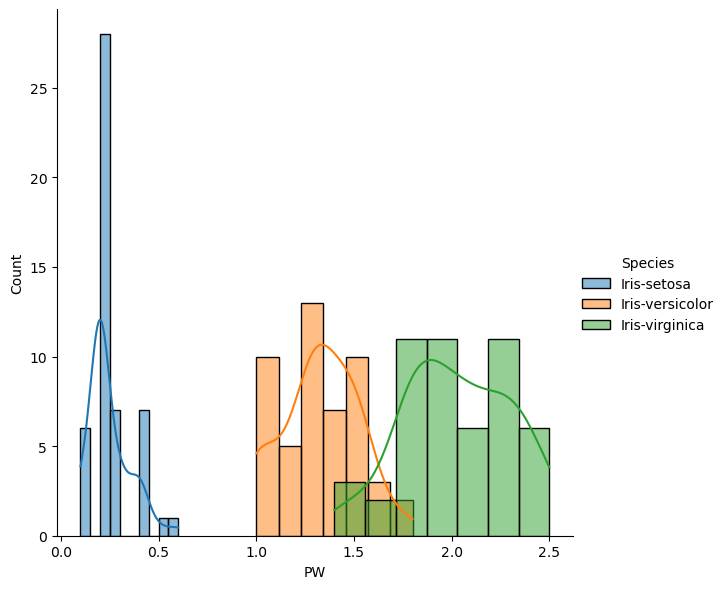

In [16]:
sns.FacetGrid(data=df, hue='Species', height=6).map(sns.histplot, 'PW', kde=True).add_legend()

You can similarly do this for all the atributes and figure out which is the best parameter that has the best chance to accurately distinguish the species.

### Cumulative Density Function (CDF)

In [25]:
# how to calculate CDF in numpy?
np.histogram(iris_setosa['PL'], bins=10)
# this returns the count and bin edges

(array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2], dtype=int64),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

In [27]:
# store the arrays in two variables
counts, bin_edges = np.histogram(iris_setosa['PL'], bins=10)

In [30]:
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)    # cumulative sum

print(cdf)

[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


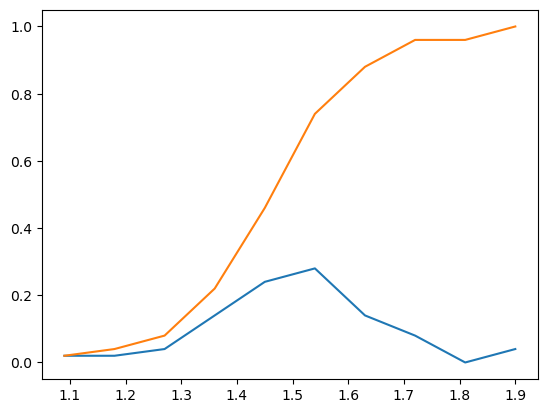

In [31]:
# now we plot both the arrays against the bin edges
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)